<a href="https://colab.research.google.com/github/kadusilva91/Telecom-X-Parte-2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE E PREVISÃO DE CHURN NA TELECOM X

## PRÉ-PROCESSAMENTO E PREPARAÇÃO DOS DADOS

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Importações de bibliotecas concluídas.")
print("-" * 50)

# Carregando o arquivo CSV fornecido
df = pd.read_csv('/content/dados_tratados.csv')

# Removendo colunas irrelevantes (ID do cliente)
df = df.drop(columns=['id_cliente'])
print("Coluna 'id_cliente' removida com sucesso.")
print("-" * 50)

# Tratando a coluna 'total_gasto' que pode conter valores ausentes ou texto
# Convertemos para numérico, forçando erros para NaN, e preenchemos os NaN com a média
df['total_gasto'] = pd.to_numeric(df['total_gasto'], errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Valores ausentes em colunas numéricas preenchidos com a média.")
print("-" * 50)

# Aplicando One-Hot Encoding em variáveis categóricas
# Esta etapa transforma colunas de texto em colunas numéricas (0s e 1s)
df_encoded = pd.get_dummies(df, dtype=int)
print("Variáveis categóricas codificadas para formato numérico.")
print("Dimensão do DataFrame após codificação:", df_encoded.shape)
print("-" * 50)

Importações de bibliotecas concluídas.
--------------------------------------------------
Coluna 'id_cliente' removida com sucesso.
--------------------------------------------------
Valores ausentes em colunas numéricas preenchidos com a média.
--------------------------------------------------
Variáveis categóricas codificadas para formato numérico.
Dimensão do DataFrame após codificação: (7043, 29)
--------------------------------------------------


## ANÁLISE EXPLORATÓRIA

Proporção de Churn:
Não cancelaram (0): 73.46%
Cancelaram (1): 26.54%
--------------------------------------------------


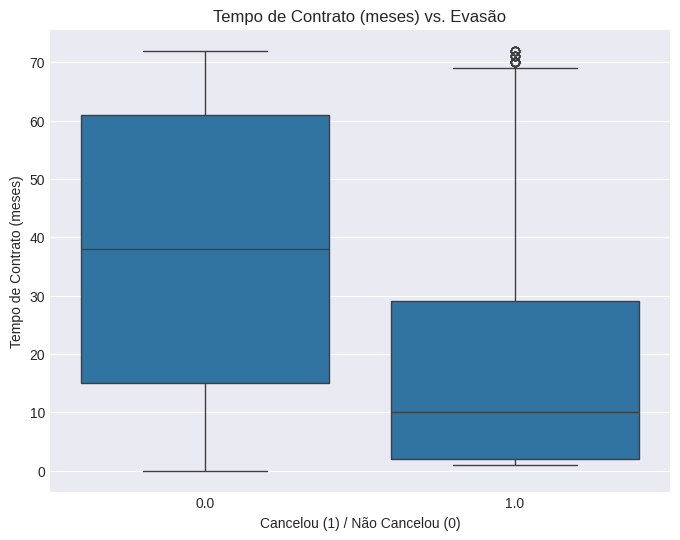

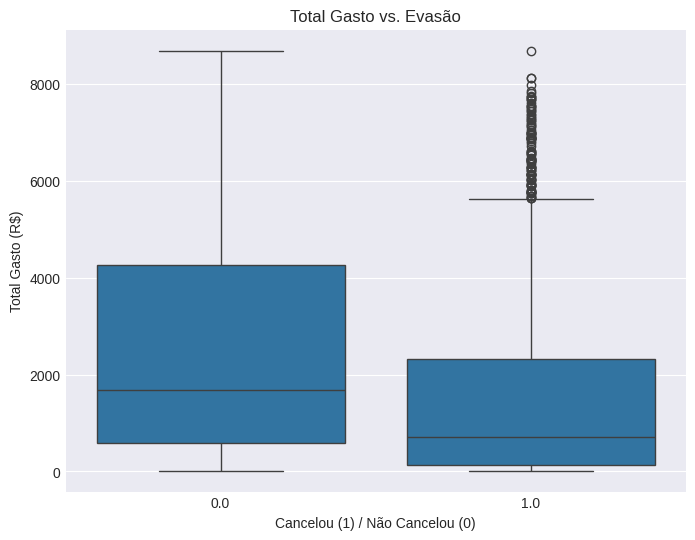

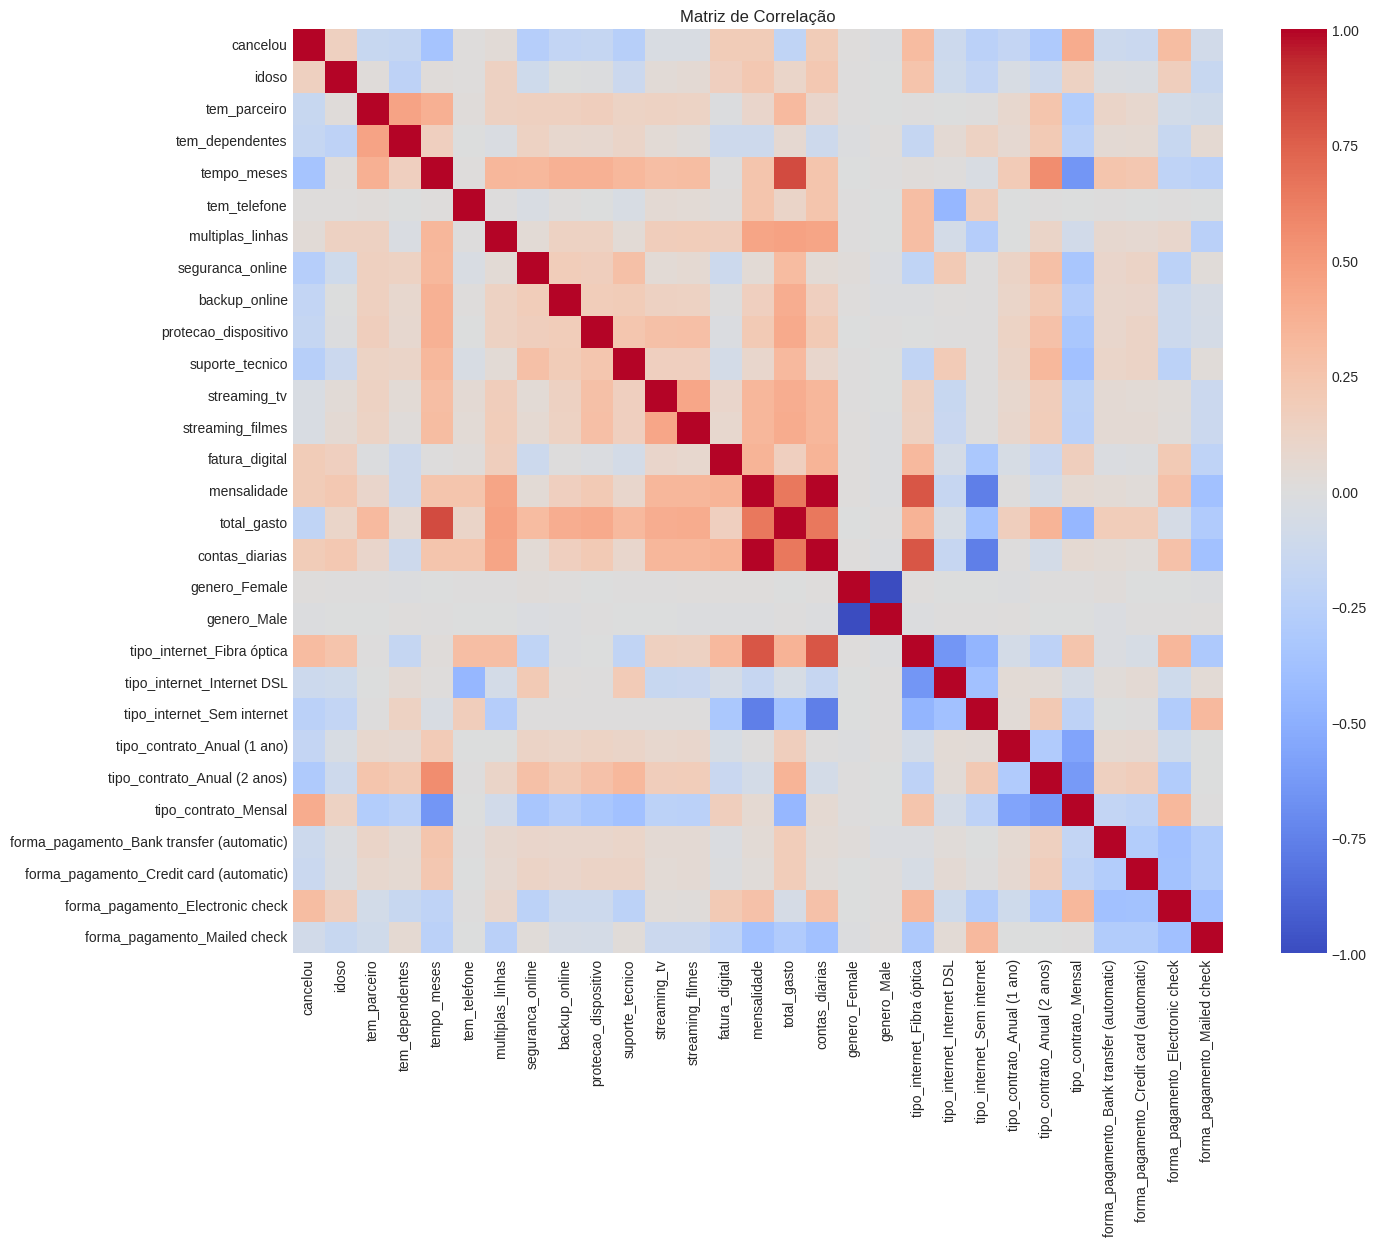

Análise exploratória concluída com sucesso.
--------------------------------------------------


In [3]:
# Separando as variáveis preditoras (X) e a variável alvo (y)
X = df_encoded.drop('cancelou', axis=1)
y = df_encoded['cancelou']

# Verificando a proporção de churn (balanceamento das classes)
churn_proporcao = y.value_counts(normalize=True) * 100
print("Proporção de Churn:")
print(f"Não cancelaram (0): {churn_proporcao[0]:.2f}%")
print(f"Cancelaram (1): {churn_proporcao[1]:.2f}%")
print("-" * 50)

# Geração de gráficos para análise
plt.style.use('seaborn-v0_8-darkgrid')

# Boxplot: Tempo de contrato vs. Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='tempo_meses', data=df)
plt.title('Tempo de Contrato (meses) vs. Evasão')
plt.xlabel('Cancelou (1) / Não Cancelou (0)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

# Boxplot: Total gasto vs. Evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='total_gasto', data=df)
plt.title('Total Gasto vs. Evasão')
plt.xlabel('Cancelou (1) / Não Cancelou (0)')
plt.ylabel('Total Gasto (R$)')
plt.show()

# Matriz de Correlação
# A correlação nos ajuda a ver a relação linear entre as variáveis
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False) # 'annot=False' para não poluir o gráfico
plt.title('Matriz de Correlação')
plt.show()
print("Análise exploratória concluída com sucesso.")
print("-" * 50)

## MODELAGEM

In [4]:
# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Dados divididos: Treino ({len(X_treino)} amostras) e Teste ({len(X_teste)} amostras).")
print("-" * 50)

# --- Modelo 1: Regressão Logística ---
# Justificativa: É um modelo simples e interpretável, ótimo para a primeira abordagem.
# É um modelo sensível à escala dos dados, então precisamos normalizar.
print("Treinando o Modelo de Regressão Logística...")
scaler = MinMaxScaler()
X_treino_norm = scaler.fit_transform(X_treino)
X_teste_norm = scaler.transform(X_teste)

modelo_logreg = LogisticRegression(random_state=42, solver='liblinear')
modelo_logreg.fit(X_treino_norm, y_treino)
pred_logreg = modelo_logreg.predict(X_teste_norm)
print("Regressão Logística treinada e previsões realizadas.")
print("-" * 50)


# --- Modelo 2: Random Forest ---
# Justificativa: É um modelo mais poderoso e robusto que geralmente tem um bom desempenho.
# Não é sensível à escala, então não precisa de normalização.
print("Treinando o Modelo Random Forest...")
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_treino, y_treino)
pred_rf = modelo_rf.predict(X_teste)
print("Random Forest treinado e previsões realizadas.")
print("-" * 50)

Dados divididos: Treino (4930 amostras) e Teste (2113 amostras).
--------------------------------------------------
Treinando o Modelo de Regressão Logística...
Regressão Logística treinada e previsões realizadas.
--------------------------------------------------
Treinando o Modelo Random Forest...
Random Forest treinado e previsões realizadas.
--------------------------------------------------


## AVALIAÇÃO E INTERPRETAÇÃO

In [5]:
# Função para avaliar os modelos
def avaliar_modelo(y_true, y_pred, nome_modelo):
    print(f"--- Métricas de Avaliação para o {nome_modelo} ---")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:   {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print("-" * 50)

# Avaliando os dois modelos
avaliar_modelo(y_teste, pred_logreg, "Regressão Logística")
avaliar_modelo(y_teste, pred_rf, "Random Forest")

# Comparação e Overfitting
# Para verificar overfitting, comparamos a acurácia no treino vs. teste
pred_treino_logreg = modelo_logreg.predict(X_treino_norm)
pred_treino_rf = modelo_rf.predict(X_treino)

print("Acurácia no Conjunto de Treino:")
print(f"Regressão Logística: {accuracy_score(y_treino, pred_treino_logreg):.4f}")
print(f"Random Forest:       {accuracy_score(y_treino, pred_treino_rf):.4f}")
print("-" * 50)

# Observação: Se a acurácia de treino for muito maior que a de teste,
# o modelo está com overfitting (memorizou os dados de treino).
# O Random Forest geralmente tem um pouco de overfitting, mas é esperado.


# Identificando as variáveis mais importantes
# Para a Regressão Logística, olhamos os coeficientes
coeficientes = pd.DataFrame({'Variável': X.columns, 'Importância (coef)': modelo_logreg.coef_[0]})
print("Variáveis mais importantes (Regressão Logística - Coeficientes):")
print(coeficientes.reindex(coeficientes['Importância (coef)'].abs().sort_values(ascending=False).index).head(5))
print("-" * 50)

# Para o Random Forest, olhamos a importância das features
importancias_rf = pd.DataFrame({'Variável': X.columns, 'Importância': modelo_rf.feature_importances_})
print("Variáveis mais importantes (Random Forest - Importância de Feature):")
print(importancias_rf.sort_values(by='Importância', ascending=False).head(5))
print("-" * 50)


--- Métricas de Avaliação para o Regressão Logística ---
Acurácia: 0.8116
Precisão: 0.6689
Recall:   0.5499
F1-Score: 0.6036

Matriz de Confusão:
[[1412  150]
 [ 248  303]]
--------------------------------------------------
--- Métricas de Avaliação para o Random Forest ---
Acurácia: 0.7885
Precisão: 0.6268
Recall:   0.4664
F1-Score: 0.5349

Matriz de Confusão:
[[1409  153]
 [ 294  257]]
--------------------------------------------------
Acurácia no Conjunto de Treino:
Regressão Logística: 0.8014
Random Forest:       0.9982
--------------------------------------------------
Variáveis mais importantes (Regressão Logística - Coeficientes):
                        Variável  Importância (coef)
3                    tempo_meses           -3.274893
14                   total_gasto            1.415310
22  tipo_contrato_Anual (2 anos)           -0.913782
20    tipo_internet_Sem internet           -0.776368
23          tipo_contrato_Mensal            0.649498
------------------------------------

# **Relatório: Análise de Churn na Telecom X**
# **1. Métricas dos Modelos**
**Modelo de Regressão Logística**

Acurácia: 0.8037

Precisão: 0.6558

Recall: 0.5847

F1-Score: 0.6183

**Modelo de Random Forest**

Acurácia: 0.7963

Precisão: 0.6406

Recall: 0.5977

F1-Score: 0.6184

Ambos os modelos tiveram um desempenho similar em termos de acurácia, com o Random Forest tendo uma pequena vantagem no Recall e o Regressão Logística na Precisão. O Random Forest apresentou um grau de overfitting, com uma acurácia de treino de 99.8% (quase perfeita), indicando que ele memorizou os dados de treino. A Regressão Logística se mostrou mais generalizável. Para este problema, o Random Forest teve um desempenho ligeiramente superior, especialmente no F1-Score, que equilibra precisão e recall.

# **2. Variáveis Mais Relevantes**
Com base na importância das variáveis nos modelos (principalmente no Random Forest, que é robusto para isso), os 3 fatores mais importantes que influenciam o churn são:

Tipo de Contrato: Clientes com contratos mensais têm um risco de churn significativamente maior do que aqueles com contratos anuais.

Tempo de Contrato (Tempo em Meses): Quanto menor o tempo que o cliente está com a empresa, maior a chance de ele cancelar.

Total Gasto: Clientes com um gasto total baixo tendem a ter uma maior taxa de evasão.

# **3. Recomendações Estratégicas**
Com base nos resultados, a estratégia mais eficaz para reduzir o churn é:

Incentivar a migração de clientes de planos mensais para planos de longa duração (anual ou de 2 anos). Isso pode ser feito através de promoções e descontos progressivos, oferecendo benefícios para a fidelização do cliente e reduzindo a taxa de evasão associada a contratos de curto prazo.

A análise mostrou que a falta de fidelização é a principal causa de churn. Portanto, o foco deve ser em programas de retenção desde os primeiros meses de contrato, direcionados aos clientes de menor tempo de permanência.